In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def f(x, a, b):
    return a*x+b

In [3]:
def ln(x, a, b):
    return a*np.log10(x)+b

In [4]:
def adim_model(t, x, a, b, c, d):
    val = ln(t, f(x, a, b), f(x, c, d))
    return val

In [5]:
def sigma_model(t, x, a, b, c, d, sigma0=0.853):
    val = sigma0*adim_model(t, x, a, b, c, d)
    return val

In [6]:
def diameter(x, sigma0=0.853):
    val = (0.75*(x/sigma0)/np.pi)**(1/3)
    return val

In [7]:
def m_adim(input_path):
    data_ = pd.read_csv(input_path)
    data = np.zeros_like(data_)
    for di, i in enumerate(data_.columns):
        data[:, di] = data_[str(i)]/data_["0"]
    df = pd.DataFrame(data, index = data_["0"], columns = data_.columns)
    return df

In [8]:
def coefficient(input_path):
    df_adim = m_adim(input_path)
    adim_data = df_adim.to_numpy()
    
    t = [int(i) for i in df_adim.columns][1:]
    m0 = [int(i) for i in df_adim.index]
    d = [i for i in [diameter(j) for j in m0]]
    
    l_t = []
    l = []
    for di, i in enumerate(d):
        y = adim_data[di, :][1:]
        popt, pcov = curve_fit(ln, t, y)
        l_t.append([popt[0], popt[1]])
    kt = np.array(l_t)
    popt0, pcov0 = curve_fit(f, d, kt[:, 0])
    popt1, pcov1 = curve_fit(f, d, kt[:, 1])
    k_val = [popt0[0], popt0[1], popt1[0], popt1[1]]
    return k_val

In [18]:
file = r"C:\Users\students\OneDrive\デスクトップ\移動用\修論\csv\raw_A.csv"

t = [i for i in np.arange(0.01, 60, 10)]
m0 = [i for i in np.arange(8.6, 28.8)]
d = [diameter(i) for i in m0]

k1, k2, k3, k4 = coefficient(file)
data = np.zeros((len(t), len(d)))

for di, i in enumerate(t):
    for dj, j in enumerate(d):
        data[di, dj] = adim_model(i, j, k1, k2, k3, k4)

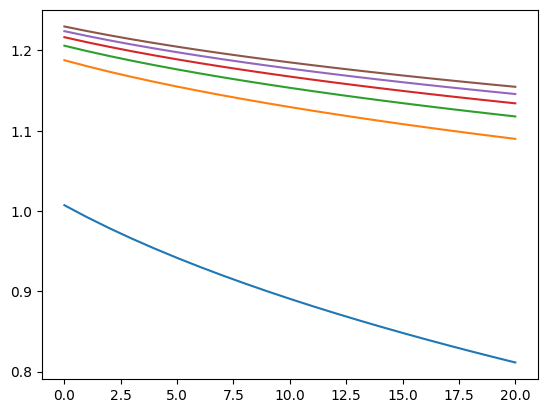

In [19]:
plt.plot(data.T)